### 2019.07.12 多云　早上8.48

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 加载数据
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["label"] = iris.target

In [3]:
#
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

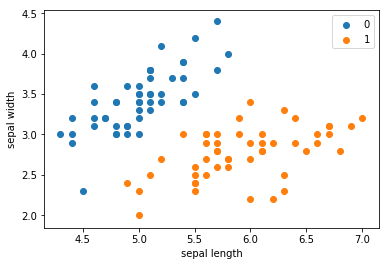

In [8]:
#绘制散点图
plt.scatter(df[:50]["sepal length"], df[:50]["sepal width"], label='0')
plt.scatter(df[50:100]["sepal length"], df[50:100]["sepal width"], label='1')
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.savefig("./imgs/分类散点图")
plt.legend()
plt.show()

In [9]:
#数据预处理
data = np.array(df.iloc[:100, [0, 1, -1]])
print(data.shape)

(100, 3)


In [10]:
X, y = data[:,:-1], data[:,-1]#取出数据和标签

In [11]:
y = np.array([1 if i == 1 else -1 for i in y])#剔除零元素为-1
#print(y)

### 感知机模型的构建

In [12]:
#前提
#1.数据为线性可分，属于二分类模型
#2.构建基础函数
class Model:
    
    def __init__(self):
        self.w = np.ones(len(data[0])-1, dtype=np.float32)
        self.b = 0
        self.l_rate = 0.1
    
    #构建函数
    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y
    
    #随机梯度下降算法的构建
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0 #误分类点个数
            for d in range(len(X_train)):#遍历整个数据点
                X = X_train[d]
                y = y_train[d]
                #判断是否为误分类点
                if y * self.sign(X, self.w, self.b) <= 0:
                    #梯度下降法更新数据
                    self.w = self.w + self.l_rate*np.dot(y, X)
                    self.b = self.b + self.l_rate*y
                    wrong_count += 1
                    
            if wrong_count == 0: #数据能够正确的分类，没有误分类的点
                    is_wrong = True
        print(wrong_count)
        return 'Perceptron Model!'
            
            
    def score(self):
        pass

In [13]:
perceptron = Model()
perceptron.fit(X, y)

0


'Perceptron Model!'

In [16]:
perceptron.w
x_points = np.linspace(4, 7,10)
x_points

array([4.        , 4.33333333, 4.66666667, 5.        , 5.33333333,
       5.66666667, 6.        , 6.33333333, 6.66666667, 7.        ])

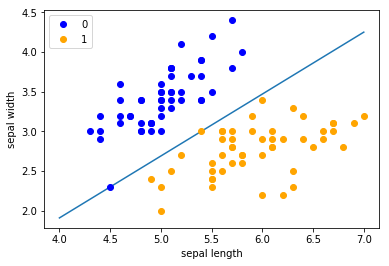

In [54]:
x_points = np.linspace(4, 7,10)
y_ = -(perceptron.w[0]*x_points + perceptron.b)/perceptron.w[1]
#绘画分类线段
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.savefig("感知机")

### scikit-learn Perceptron

In [49]:
from sklearn.linear_model import Perceptron

In [50]:
clf = Perceptron(fit_intercept=False, max_iter=1000, shuffle=False)
clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=False,
      max_iter=1000, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=False, tol=None, verbose=0, warm_start=False)

In [51]:
print(clf.coef_)

[[  74.6 -127.2]]


In [52]:
print(clf.intercept_)

[0.]


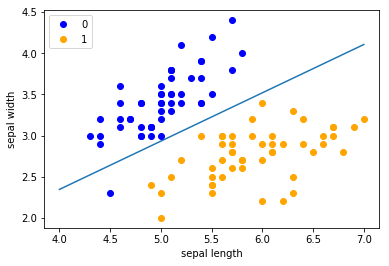

In [53]:
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()